In [19]:
from langgraph.graph import StateGraph, START, END
from langchain_ollama import ChatOllama
from typing import TypedDict, Annotated
from langchain_core.messages import HumanMessage, BaseMessage
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver

In [20]:
class ChatState(TypedDict):
    message: Annotated[list[BaseMessage], add_messages]


In [25]:
llm = ChatOllama(model="gemma3:4b")


def chat_node(state: ChatState):
    # take user query from state
    messages = state["message"]

    # send to llm
    response = llm.invoke(messages)

    # response store state
    return {"message": [response]}

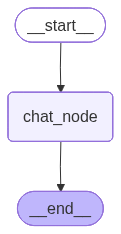

In [26]:
checkpointer = MemorySaver()

graph = StateGraph(ChatState)

# add nodes
graph.add_node("chat_node", chat_node)

# add edges
graph.add_edge(START, "chat_node")
graph.add_edge("chat_node", END)

# compile the graph
chatbot = graph.compile(checkpointer=checkpointer)

chatbot

In [ ]:
initial_state = {
    "message": [HumanMessage(content="What is the Capital of India")],
}
chatbot.invoke(initial_state)['message'][-1].content

In [27]:
thread_id = "1"

while True:
    user_message = input("Type here: ")
    print(f"User: {user_message}")
    if user_message.strip().lower() in ['exit', 'quit', 'bye']:
        break

    config = {"configurable":{"thread_id": thread_id}}

    response = chatbot.invoke({'message': [HumanMessage(content=user_message)]}, config=config)

    print(f"AI: {response['message'][-1].content}")


User: my name is tushar
AI: Okay, Tushar! It's nice to meet you. 😊 

Is there anything you’d like to talk about or anything I can help you with today?
User: 10 + 200 = 
AI: 10 + 200 = 210 

Great job! 😊
User: multiply the last result with 2
AI: Okay, 210 multiplied by 2 is 420. 

Do you want to try another calculation?
User: do you still remember my name?
AI: Yes, Tushar, I do! 😊 

How are you doing today?
User: bye



In [28]:
chatbot.get_state(config=config)

StateSnapshot(values={'message': [HumanMessage(content='my name is tushar', additional_kwargs={}, response_metadata={}, id='555ac699-aee4-4dc6-a84c-6b7a9e796539'), AIMessage(content="Okay, Tushar! It's nice to meet you. 😊 \n\nIs there anything you’d like to talk about or anything I can help you with today?", additional_kwargs={}, response_metadata={'model': 'gemma3:4b', 'created_at': '2025-10-11T12:29:54.8242125Z', 'done': True, 'done_reason': 'stop', 'total_duration': 6228216000, 'load_duration': 5407738100, 'prompt_eval_count': 15, 'prompt_eval_duration': 41247100, 'eval_count': 37, 'eval_duration': 723462300, 'model_name': 'gemma3:4b'}, id='run--a25aa33a-0b38-41f3-9588-ef5766f6ba73-0', usage_metadata={'input_tokens': 15, 'output_tokens': 37, 'total_tokens': 52}), HumanMessage(content='10 + 200 = ', additional_kwargs={}, response_metadata={}, id='4520bb07-a371-4ed3-8693-6126f37d52ae'), AIMessage(content='10 + 200 = 210 \n\nGreat job! 😊', additional_kwargs={}, response_metadata={'mode